In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Load The Data and Begin Cleaning

In [2]:
df = pd.read_csv('Crime_Incidents_in_2018.csv')

In [3]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.010669,38.917005,18000270,2018/01/01 15:32:18+00,DAY,OTHERS,THEFT/OTHER,1 - 99 BLOCK OF U STREET NW,399074.970000,138792.190000,...,003301 2,3301,Precinct 135,38.916997,-77.010666,NaN,2018/01/01 04:00:43+00,2018/01/01 14:00:08+00,133877553,NaN
1,-77.058083,38.934832,18000278,2018/01/01 15:45:50+00,DAY,OTHERS,THEFT/OTHER,3319 - 3499 BLOCK OF CONNECTICUT AVENUE NW,394964.330000,140772.690000,...,001304 1,1304,Precinct 34,38.934824,-77.058081,NaN,2018/01/01 15:10:15+00,2018/01/01 15:15:41+00,133877554,NaN
2,-77.095454,38.927493,18000280,2018/01/01 15:37:51+00,DAY,OTHERS,THEFT F/AUTO,2600 - 3199 BLOCK OF CHAIN BRIDGE ROAD NW,391723.360000,139960.680000,...,000804 1,804,Precinct 8,38.927485,-77.095451,NaN,2018/01/01 15:17:38+00,2018/01/01 15:37:37+00,133877555,NaN
3,-76.978134,38.883335,18000292,2018/01/01 16:22:24+00,DAY,OTHERS,THEFT F/AUTO,1800 - 1899 BLOCK OF POTOMAC AVENUE SE,401897.419872,135054.723835,...,006802 2,6802,Precinct 87,38.883327,-76.978131,NaN,2018/01/01 14:30:32+00,2018/01/01 15:30:10+00,133877556,NaN
4,-76.923525,38.888103,18000294,2018/01/01 16:27:02+00,DAY,OTHERS,MOTOR VEHICLE THEFT,1 - 149 BLOCK OF 54TH STREET SE,406635.050000,135586.610000,...,009903 2,9903,Precinct 105,38.888096,-76.923523,NaN,2018/01/01 02:00:39+00,2018/01/01 06:30:57+00,133877557,NaN


In [4]:
df.isnull().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        0
ANC                         0
DISTRICT                   53
PSA                        58
NEIGHBORHOOD_CLUSTER        0
BLOCK_GROUP                 0
CENSUS_TRACT                0
VOTING_PRECINCT             0
LATITUDE                    0
LONGITUDE                   0
BID                     27460
START_DATE                  0
END_DATE                 6338
OBJECTID                    0
OCTO_RECORD_ID          33825
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33825 entries, 0 to 33824
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     33825 non-null  float64
 1   Y                     33825 non-null  float64
 2   CCN                   33825 non-null  int64  
 3   REPORT_DAT            33825 non-null  object 
 4   SHIFT                 33825 non-null  object 
 5   METHOD                33825 non-null  object 
 6   OFFENSE               33825 non-null  object 
 7   BLOCK                 33825 non-null  object 
 8   XBLOCK                33825 non-null  float64
 9   YBLOCK                33825 non-null  float64
 10  WARD                  33825 non-null  int64  
 11  ANC                   33825 non-null  object 
 12  DISTRICT              33772 non-null  float64
 13  PSA                   33767 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  33825 non-null  object 
 15  BLOCK_GROUP        

In [31]:
df['METHOD'].unique()

array(['OTHERS', 'KNIFE', 'GUN'], dtype=object)

There are a ton of columns on here, I could start to eliminate them ,but this dataset already have a ton of columns, that I wont be using.  Will just ignore, them. Now let's look at the time aspect and visualize it. 

In [6]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [7]:
time = df['START_DATE'].iloc[0]
df['Hour'] = df['START_DATE'].apply(lambda time:time.hour)
df['Month'] = df['START_DATE'].apply(lambda time: time.month)
df['Day of Week'] = df['START_DATE'].apply(lambda time: time.dayofweek)

In [8]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

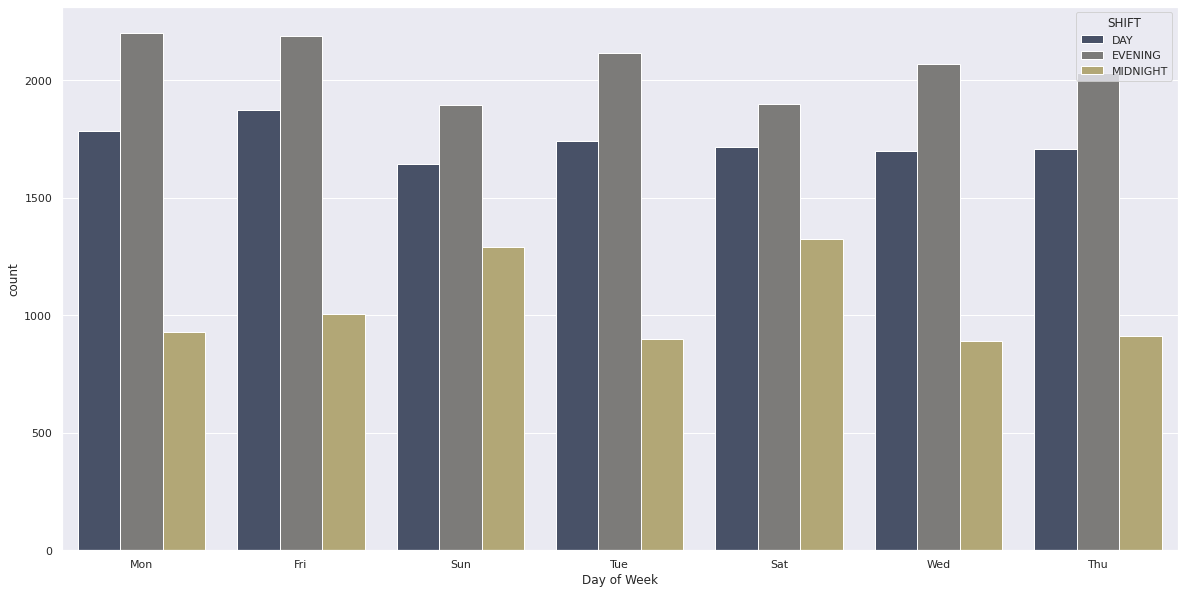

In [9]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x='Day of Week', data = df, hue = 'SHIFT', palette='cividis')

<AxesSubplot:xlabel='Month', ylabel='count'>

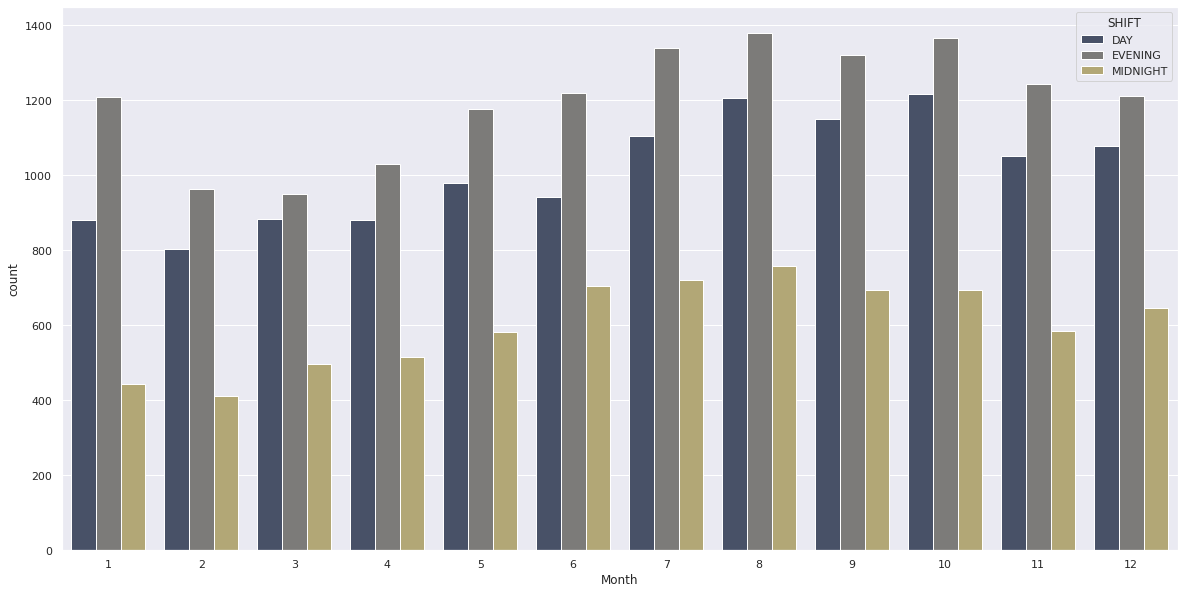

In [10]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x='Month', data = df, hue='SHIFT', palette='cividis')

<AxesSubplot:xlabel='Month', ylabel='count'>

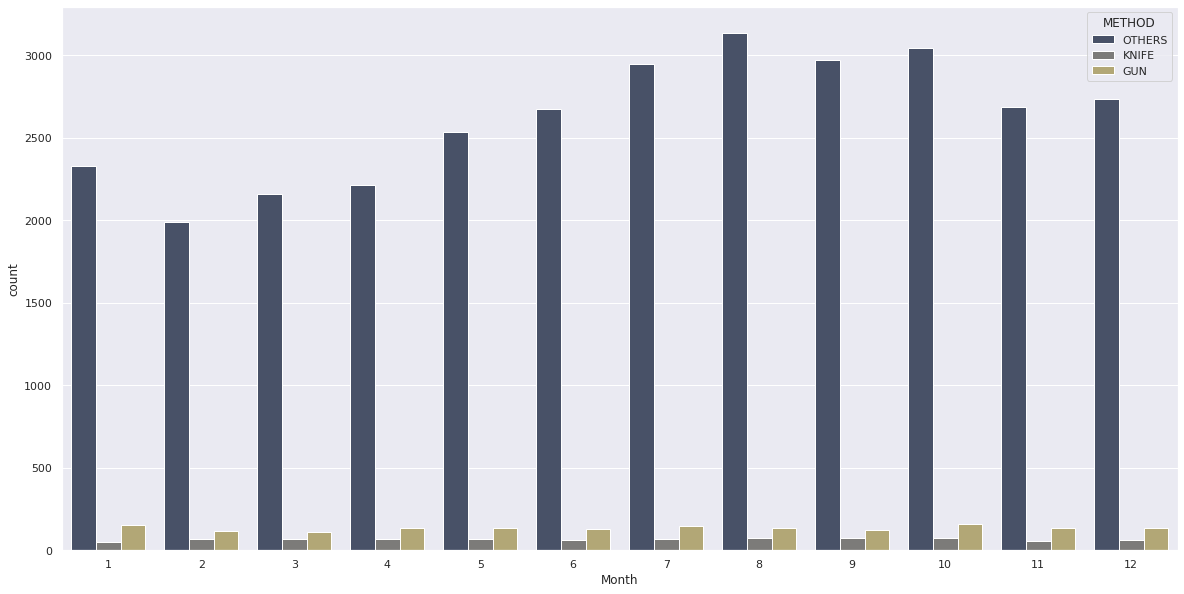

In [34]:
sns.set(rc={'figure.figsize' :(20,10)})
sns.countplot(x='Month', data = df, hue='METHOD', palette='cividis')

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

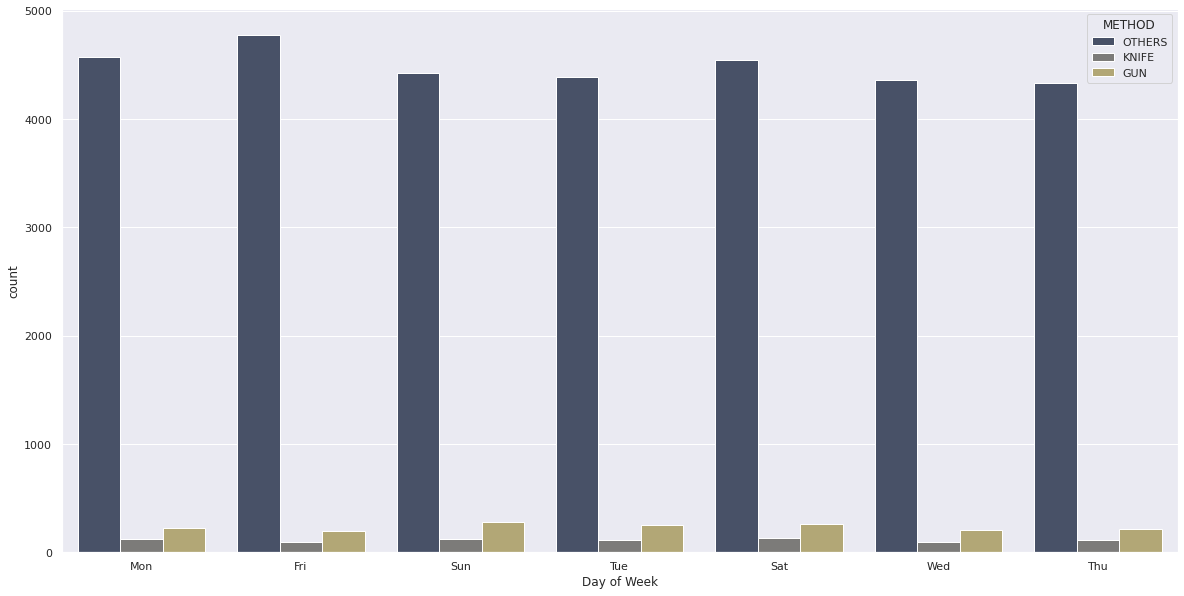

In [35]:
sns.set(rc={'figure.figsize' :(20,10)})
sns.countplot(x='Day of Week', data = df, hue='METHOD', palette='cividis')

In [11]:
byMonth = df.groupby('Month').count()
byMonth.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,,,
1,2532,2532,2532,2532,2532,2532,2532,2532,2532,2532,...,2532,2532,2532,462,2532,2384,2532,0,2532,2532
2,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,...,2176,2176,2176,377,2176,2063,2176,0,2176,2176
3,2330,2330,2330,2330,2330,2330,2330,2330,2330,2330,...,2330,2330,2330,417,2330,1918,2330,0,2330,2330
4,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,...,2424,2424,2424,467,2424,1728,2424,0,2424,2424
5,2737,2737,2737,2737,2737,2737,2737,2737,2737,2737,...,2737,2737,2737,483,2737,2092,2737,0,2737,2737


<AxesSubplot:xlabel='Month'>

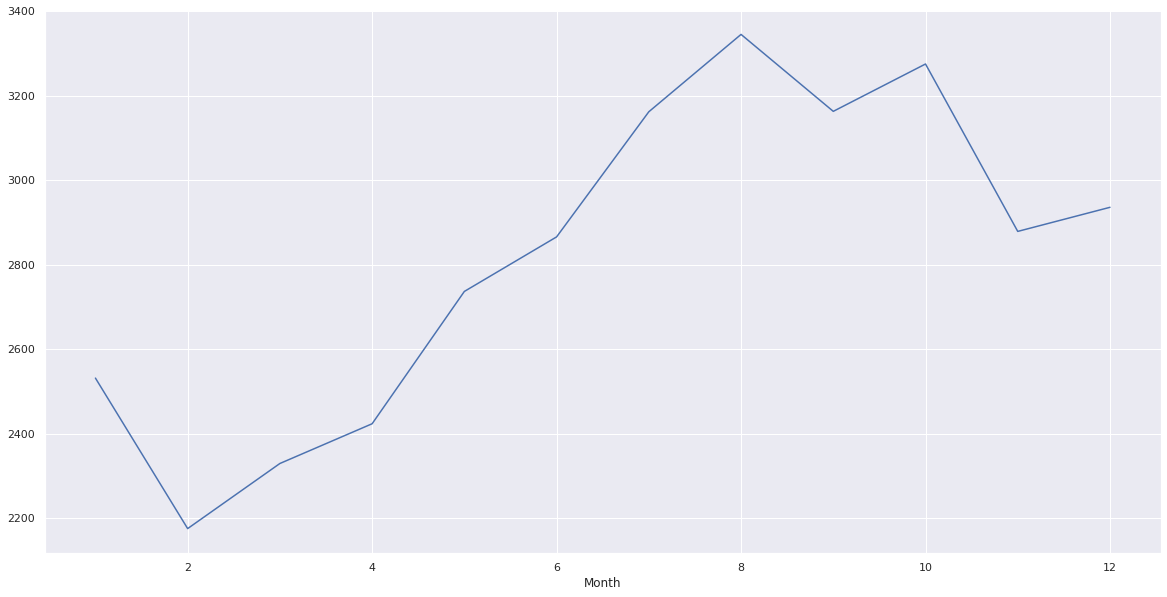

In [12]:
byMonth['SHIFT'].plot()

In [17]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['OBJECTID'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,256,248,213,172,181,129,98,77,58,70,...,246,224,288,292,284,341,325,327,344,345
Mon,252,217,211,153,153,127,101,78,53,60,...,204,252,276,313,303,301,323,333,300,328
Sat,265,256,255,207,226,189,191,193,88,70,...,206,233,274,273,264,289,262,258,244,268
Sun,244,195,236,220,216,213,218,185,140,73,...,191,217,248,260,267,301,269,264,254,256
Thu,279,235,224,190,128,96,73,55,47,55,...,232,215,256,279,294,314,279,265,302,296


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

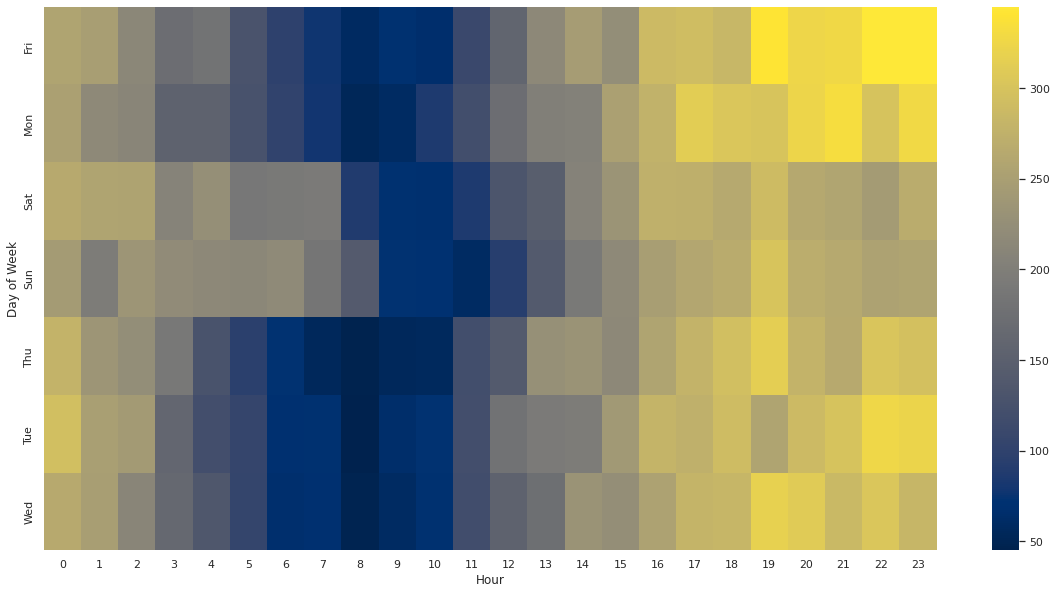

In [14]:
sns.heatmap(dayHour, cmap='cividis')

In [15]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['CCN'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,344,297,394,333,353,499,460,562,448,436,514,427
Mon,385,325,313,414,371,366,552,427,429,526,394,413
Sat,340,314,389,346,332,490,438,457,522,447,399,468
Sun,308,295,287,379,353,359,502,444,540,480,360,523
Thu,321,310,381,321,456,409,375,499,399,364,429,391


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

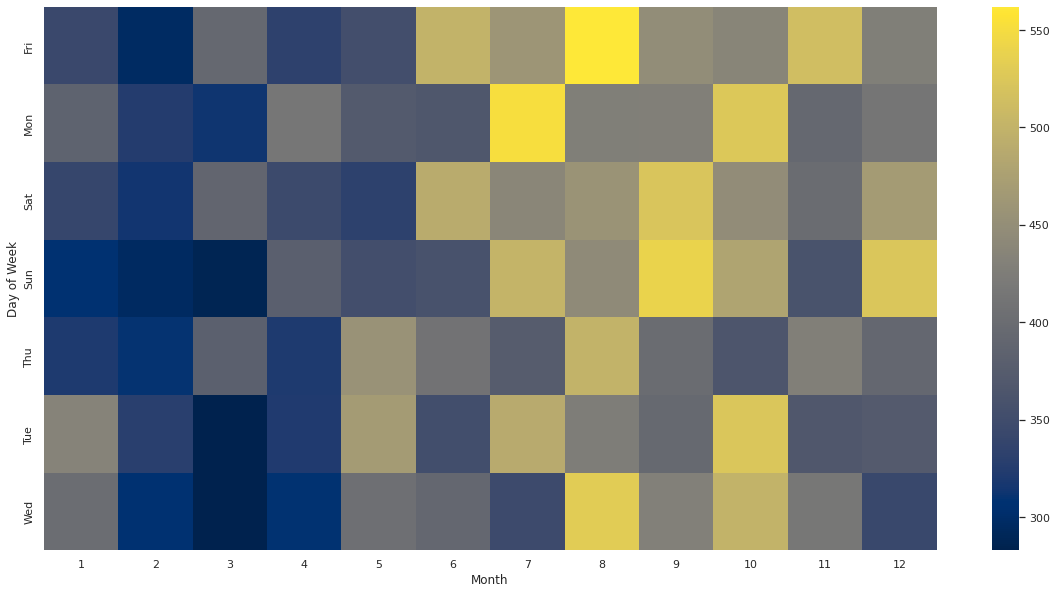

In [16]:
sns.heatmap(dayMonth, cmap='cividis')

In [18]:
df['OFFENSE'].value_counts()\
            .head(20)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,THEFT/OTHER,14229
1,THEFT F/AUTO,11640
2,MOTOR VEHICLE THEFT,2399
3,ROBBERY,2026
4,ASSAULT W/DANGEROUS WEAPON,1670
5,BURGLARY,1420
6,SEX ABUSE,276
7,HOMICIDE,160
8,ARSON,5


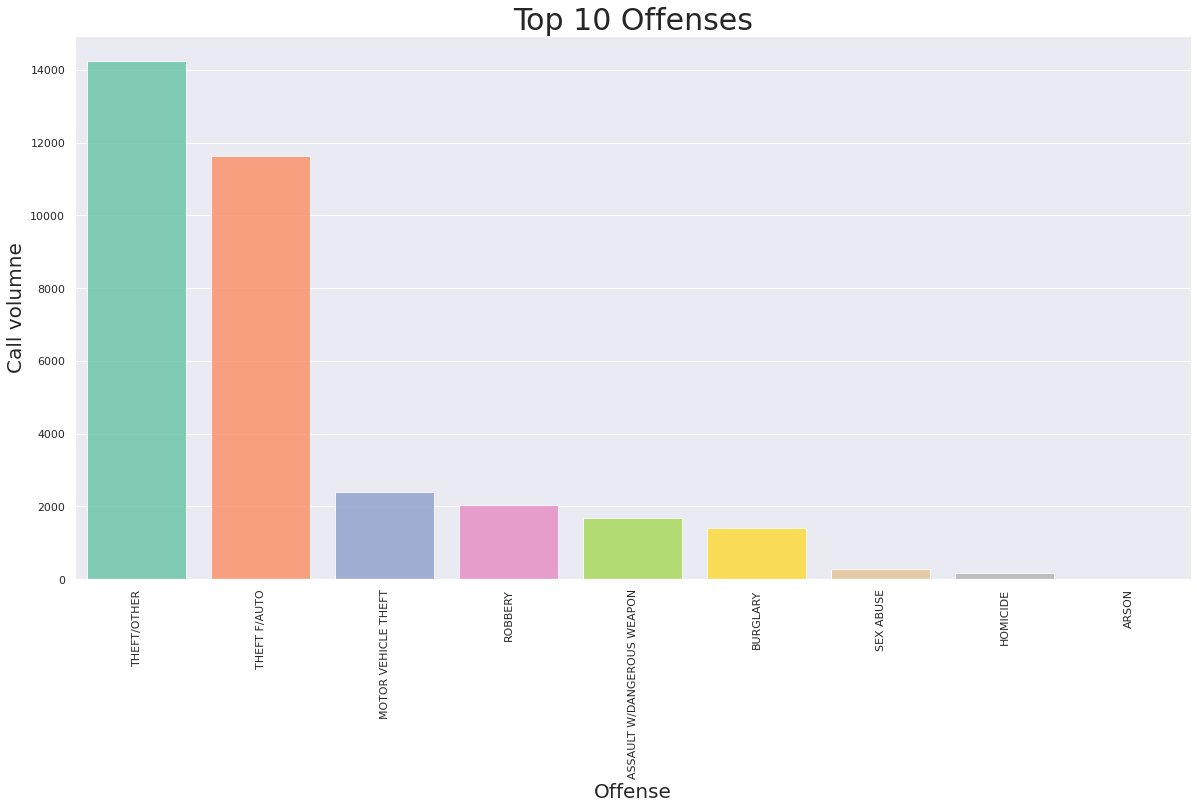

In [30]:
offense_count = df['OFFENSE'].value_counts()
offense_count = offense_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(x = offense_count.index, y = offense_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top 10 Offenses', fontsize = 30)
plt.xlabel('Offense', fontsize = 20)
plt.ylabel('Call volumne', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [19]:
df['SHIFT'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset= 'Count')

,index,Count
0,EVENING,14403
1,DAY,12172
2,MIDNIGHT,7250


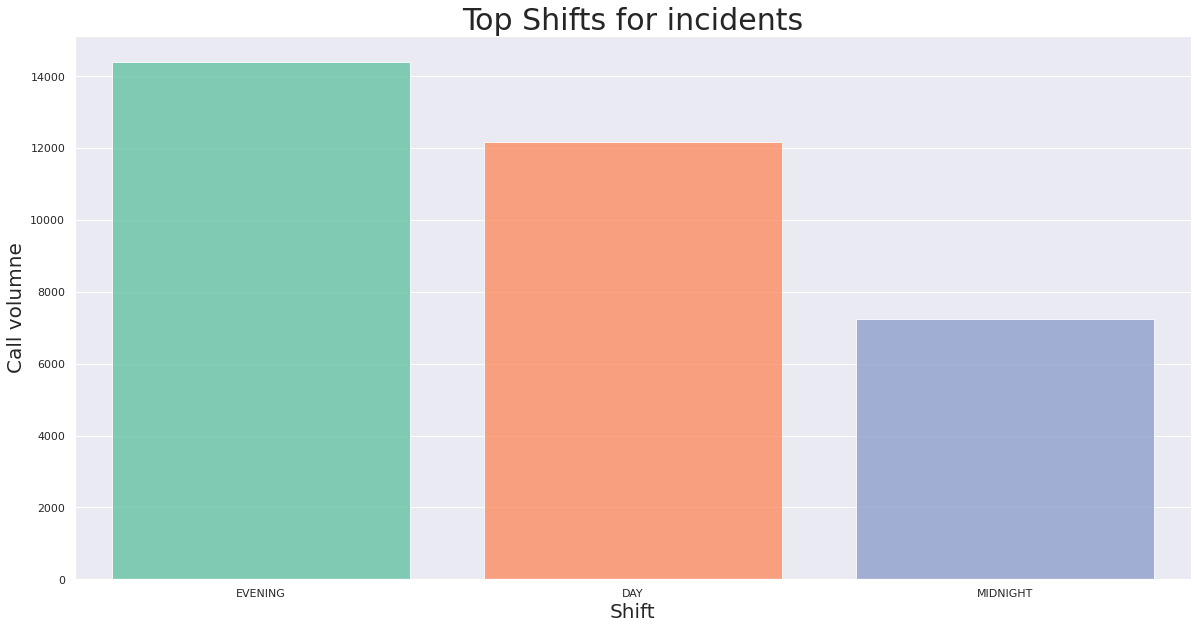

In [29]:
shift_count = df['SHIFT'].value_counts()
shift_count = shift_count[:]
plt.figure(figsize = (20,10))
sns.barplot(x = shift_count.index, y = shift_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top Shifts for incidents', fontsize = 30)
plt.xlabel('Shift', fontsize = 20)
plt.ylabel('Call volumne', fontsize = 20)
plt.show()

In [20]:
df['BLOCK'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset= 'Count')

,index,Count
0,3100 - 3299 BLOCK OF 14TH STREET NW,258
1,900 - 999 BLOCK OF RHODE ISLAND AVENUE NE,179
2,1 - 99 BLOCK OF H STREET NW,168
3,1200 - 1229 BLOCK OF 1ST STREET NE,145
4,600 - 699 BLOCK OF H STREET NE,127
5,1000 - 1249 BLOCK OF BRENTWOOD ROAD NE,113
6,3200 - 3275 BLOCK OF M STREET NW,112
7,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,106
8,900 - 1199 BLOCK OF 4TH STREET SW,97
9,500 - 503 BLOCK OF 12TH STREET SE,95


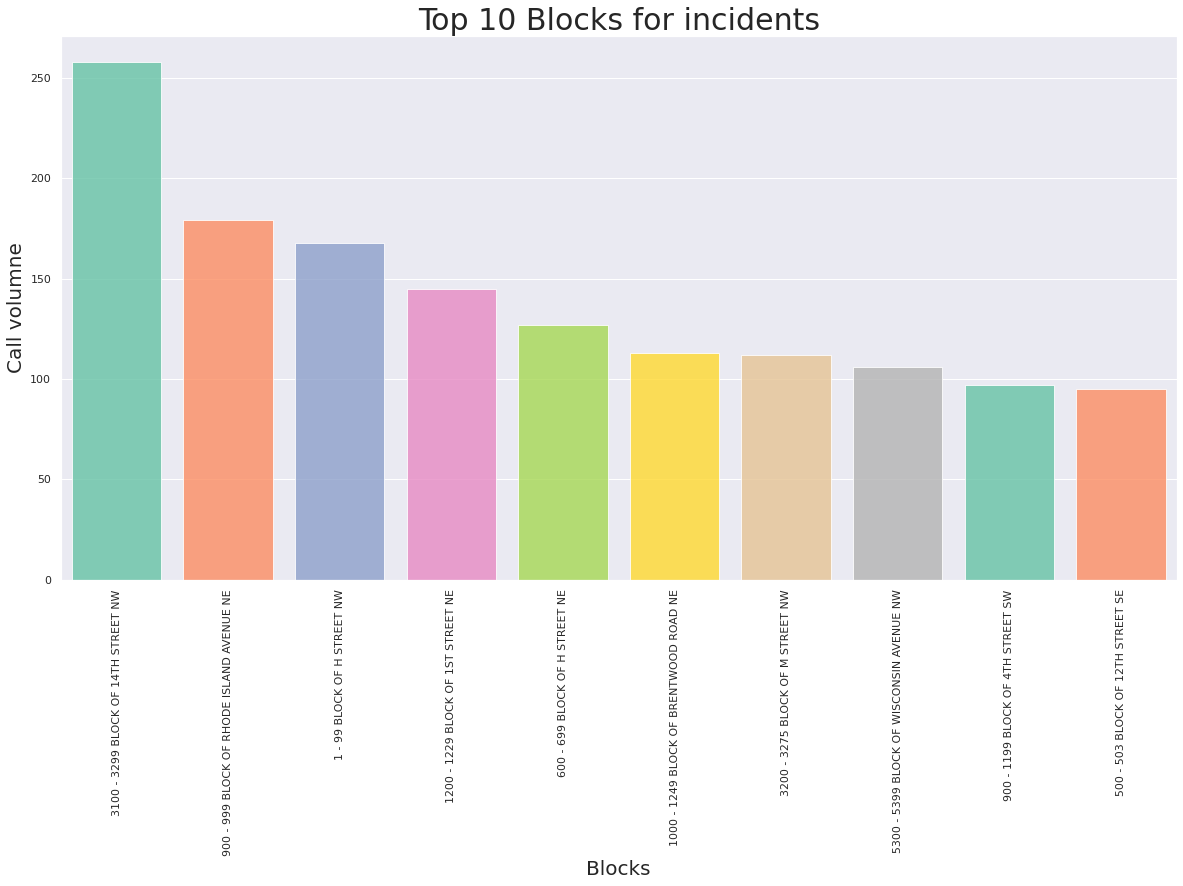

In [25]:
block_count = df['BLOCK'].value_counts()
block_count = block_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(x = block_count.index, y = block_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top 10 Blocks for incidents', fontsize = 30)
plt.xlabel('Blocks', fontsize = 20)
plt.ylabel('Call volumne', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [24]:
df['DISTRICT'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset= 'Count')

,index,Count
0,2.000000,6470
1,3.000000,6243
2,5.000000,4922
3,1.000000,4764
4,6.000000,4437
5,4.000000,4294
6,7.000000,2642


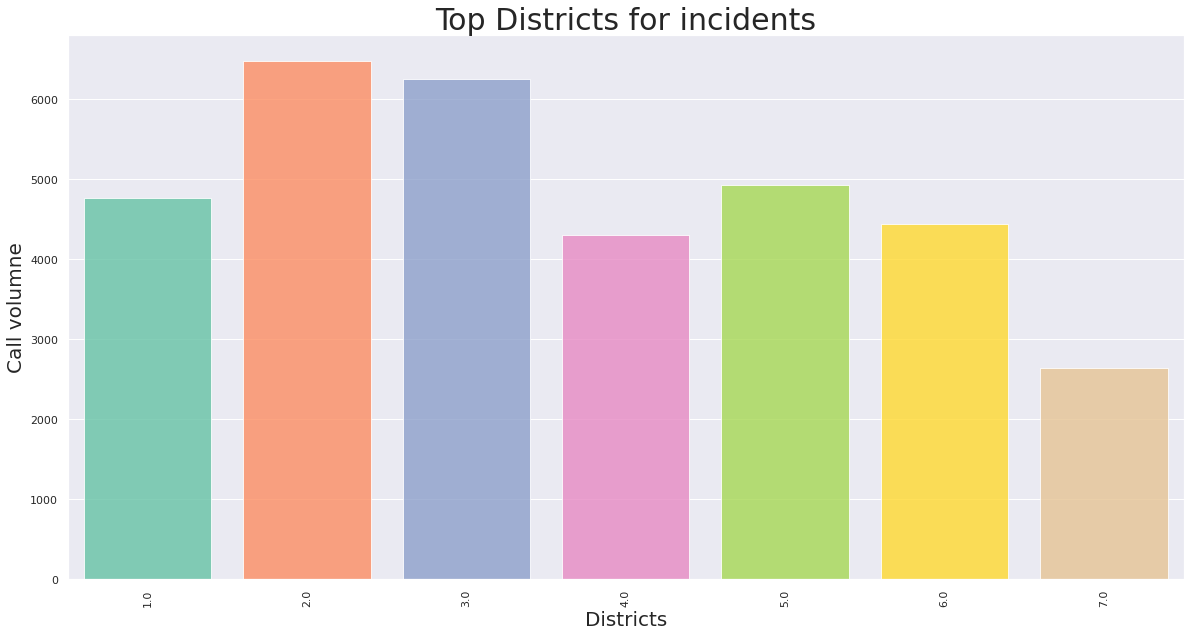

In [27]:
district_count = df['DISTRICT'].value_counts()
district_count = district_count[:]
plt.figure(figsize = (20,10))
sns.barplot(x = district_count.index, y = district_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top Districts for incidents', fontsize = 30)
plt.xlabel('Districts', fontsize = 20)
plt.ylabel('Call volumne', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [32]:
df['METHOD'].value_counts()\
            .head()\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset='Count')
            

,index,Count
0,OTHERS,31410
1,GUN,1618
2,KNIFE,797


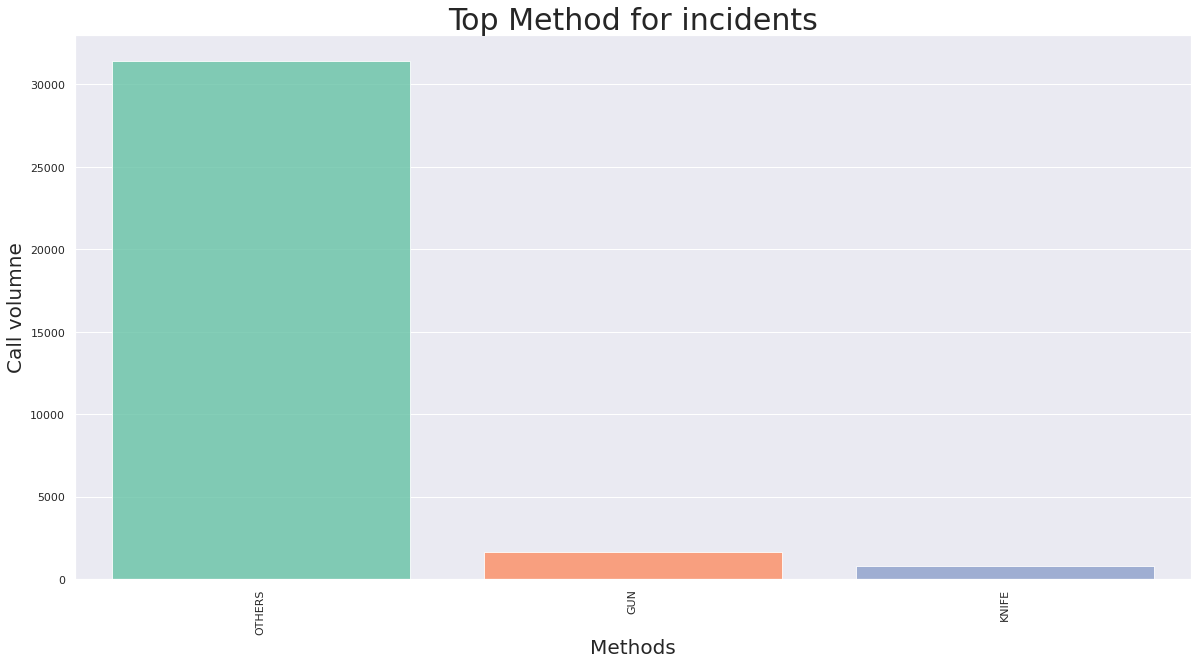

In [33]:
method_count = df['METHOD'].value_counts()
method_count = method_count[:]
plt.figure(figsize = (20,10))
sns.barplot(x = method_count.index, y = method_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top Method for incidents', fontsize = 30)
plt.xlabel('Methods', fontsize = 20)
plt.ylabel('Call volumne', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()